In [1]:
import numpy as np
from  time_series import sample_timeseries, whiten_transforms, whiten_transforms_from_cdf
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Generate a Gaussian distribution
data=np.random.normal(1,1.,size=200)

(array([ 3.,  1., 10., 31., 50., 51., 27., 16.,  7.,  4.]),
 array([-2.01630969, -1.44768192, -0.87905414, -0.31042636,  0.25820141,
         0.82682919,  1.39545697,  1.96408475,  2.53271252,  3.1013403 ,
         3.66996808]),
 <a list of 10 Patch objects>)

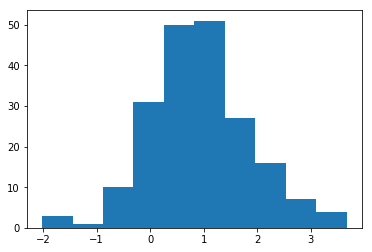

In [3]:
plt.hist(data)

0.9322269183188813 0.9433644770884416


/home/govinda/miniconda3/envs/MLS/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


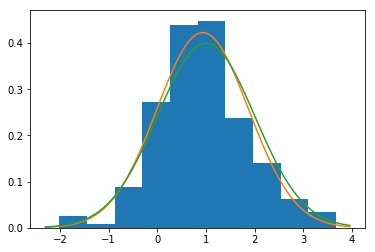

In [4]:
#- fit data to a Gaussian function
from scipy.stats import norm
mu,sig=norm.fit(data)
print(mu,sig)
#- plot
plt.hist(data, bins=10, normed=True)
xmin,xmax=plt.xlim()
x = np.linspace(xmin, xmax, 100)
y = norm.pdf(x, mu, sig)
plt.plot(x, y)

def norm_model(x):
    p = np.array([1.,1.]) #- Gaussian parm for mean=1, std=1.
    y = norm.pdf(x,p[0],p[1])
    return y / (y.sum() * np.gradient(x))
model=norm_model(x)
plt.plot(x,model)
plt.show()

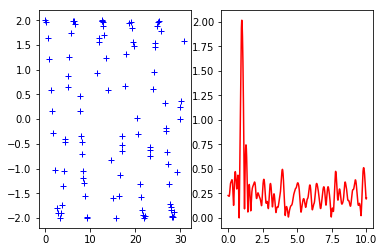

In [16]:
import scipy.signal
def test_period():
    A = 2.
    w = 1.
    phi = 0.5 * np.pi
    nin = 1000
    nout = 100000
    frac_points = 0.9 # Fraction of points to select
    
    r = np.random.rand(nin)
    x = np.linspace(0.01, 10*np.pi, nin)
    x = x[r >= frac_points]
    normval = x.shape[0] # For normalization of the periodogram
    y = A * np.sin(w*x+phi)
    #fig=plt.figure()
    ax0=plt.subplot(121)
    ax0.plot(x,y,'b+')
    f = np.linspace(0.01, 10, nout)
    pgram = scipy.signal.lombscargle(x, y, f)
    ax=plt.subplot(122)
    ax.plot(f, np.sqrt(4*(pgram/normval)),'r-')
    #ax.set_yscale('log')
    #ax.set_xscale('log')
    plt.show()
    return x,y
x,y = test_period()

In [8]:
#- generate power spectrum for the signal
def get_psd(x,y,freq):
    from scipy.signal import lombscargle
    return lombscargle(x,y,freq)
    

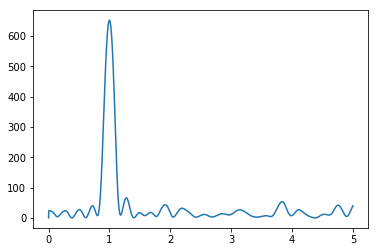

In [9]:
dt=0.1
n_sample=2000
df=1/(n_sample*dt)
f_grid=np.arange(1 + (n_sample // 2)) * df
psd_grid = np.empty_like(f_grid)
psd_grid[1:] = get_psd(x,y,f_grid[1:])
psd_grid[0] = 0.
# Force the variance to one.
psd_grid[1:] /= psd_grid[1:].sum() * df ** 2
plt.plot(f_grid,psd_grid)

In [28]:
def psd_model(freq,N,f0,a0,a1):    
    return (N * (freq/f0)**a0 / (1 + (freq/f0)**a0) * ((freq/f0) ** a1) / (1 + (freq/f0) ** a1))

def fit_psd(freq,psd):
    #N, f0, a0, a1 = 8000, 0.10, 2.8, -1.1
    from scipy.optimize import curve_fit
    popt,pcov=curve_fit(psd_model,freq,psd)

fit_psd(f_grid[1:],psd_grid[1:])

/home/govinda/miniconda3/envs/MLS/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in power
  


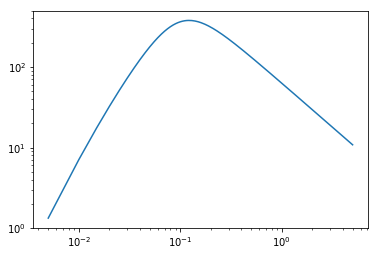

In [20]:
pp=_seeing_psd(f_grid[1:])
fig=plt.figure()
ax=plt.subplot(111)
ax.plot(f_grid[1:],pp)
ax.set_yscale('log')
ax.set_xscale('log')
plt.show()